In [30]:
import os
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 

import pywt
import pywt.data

In [2]:
data = pd.read_excel (r'C:\\Users\\Korisnik\\Desktop\\New folder\\Reports 20190806.xlsx', sheet_name ='YReport2') #for an earlier version of Excel, you may need to use the file extension of 'xls'
print (data)

    Period  Residential Construction Permits Authorized  \
0     1975                                        939.2   
1     1976                                       1296.1   
2     1977                                       1689.9   
3     1978                                       1800.5   
4     1979                                       1551.8   
5     1980                                       1190.6   
6     1981                                        985.6   
7     1982                                       1000.5   
8     1983                                       1605.1   
9     1984                                       1681.9   
10    1985                                       1733.3   
11    1986                                       1769.5   
12    1987                                       1534.8   
13    1988                                       1455.6   
14    1989                                       1338.5   
15    1990                                       1110.8 

In [3]:
data.columns

Index(['Period', 'Residential Construction Permits Authorized',
       'Residential Construction Units Completed', 'Home Sales',
       'Homes Sold Average Sales Price', 'Rental Vacancy Rate'],
      dtype='object')

In [4]:
df = pd.DataFrame(data, columns= data.columns)
df = df.drop(['Period'], axis = 1) 
df

,Residential Construction Permits Authorized,Residential Construction Units Completed,Home Sales,Homes Sold Average Sales Price,Rental Vacancy Rate
0,939.2,1317.1,550,510.3,6.000
1,1296.1,1377.2,647,577.2,5.575
2,1689.9,1657.2,820,652.2,5.225
3,1800.5,1867.6,818,752.0,5.025
4,1551.8,1870.8,709,863.0,5.425
5,1190.6,1501.5,545,917.1,5.375
6,985.6,1265.8,436,996.8,5.050
7,1000.5,1005.5,413,1005.8,5.300
8,1605.1,1390.5,622,1078.4,5.625
9,1681.9,1652.1,639,1169.9,5.850


In [5]:
df.describe()

,Residential Construction Permits Authorized,Residential Construction Units Completed,Home Sales,Homes Sold Average Sales Price,Rental Vacancy Rate
count,44.000000,44.000000,44.000000,44.000000,44.000000
mean,1356.625000,1359.729545,676.977273,2322.193182,7.603977
std,381.217716,360.830891,225.071925,1195.895986,1.573564
min,583.000000,585.000000,305.000000,510.300000,5.025000
25%,1084.050000,1144.525000,528.000000,1312.400000,6.762500
50%,1355.150000,1395.400000,657.500000,2040.850000,7.487500
75%,1643.425000,1649.325000,808.250000,3299.825000,8.487500
max,2155.200000,1979.400000,1283.000000,4551.800000,10.625000


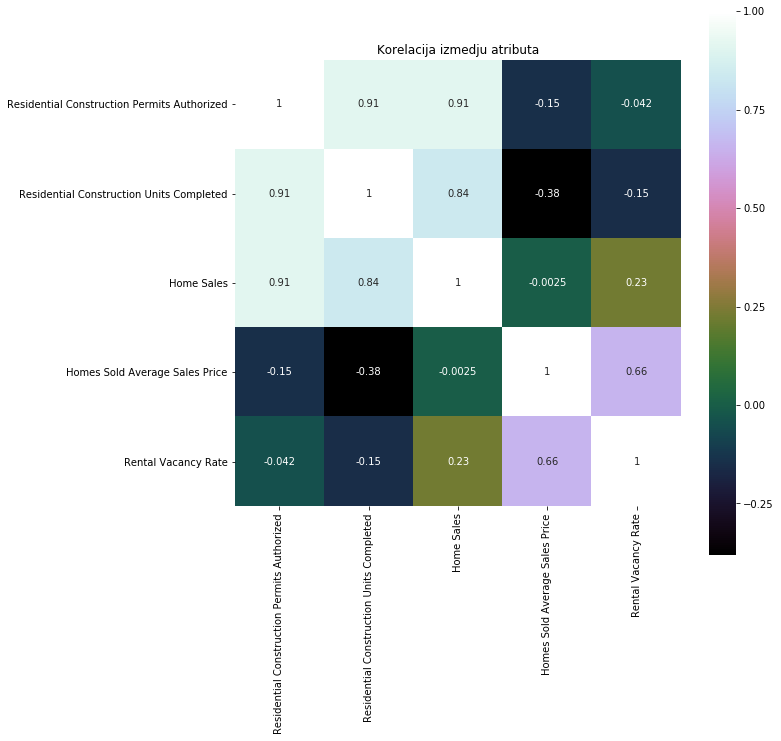

In [29]:
#korelacija medju atributima
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Korelacija izmedju atributa')
plt.show()

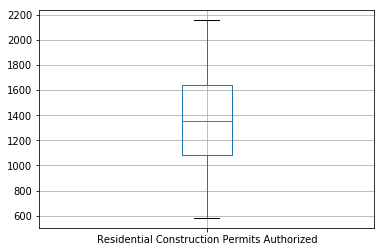

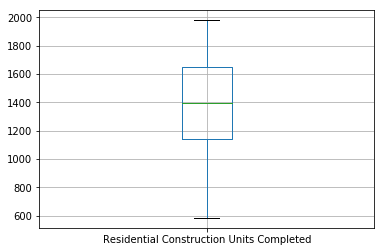

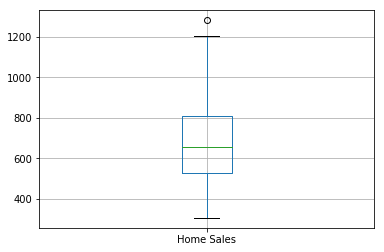

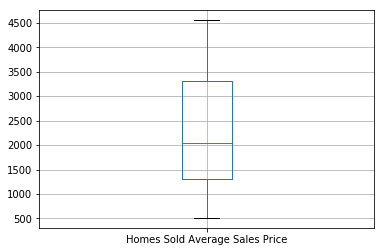

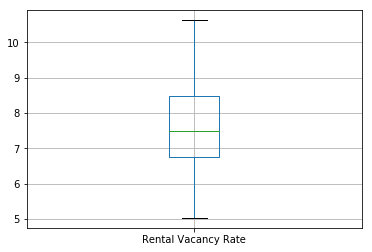

In [7]:
#plotujemo boxplotove da bolje analiziramo podatke, autlejeri(podaci koji strce) bitno uticu na analizu, ovde nema autlejera osim kod Home Sales
for column in df:
    plt.figure()
    df.boxplot([column])

In [8]:
X = df.iloc[:,:].values
X

array([[ 939.2  , 1317.1  ,  550.   ,  510.3  ,    6.   ],
       [1296.1  , 1377.2  ,  647.   ,  577.2  ,    5.575],
       [1689.9  , 1657.2  ,  820.   ,  652.2  ,    5.225],
       [1800.5  , 1867.6  ,  818.   ,  752.   ,    5.025],
       [1551.8  , 1870.8  ,  709.   ,  863.   ,    5.425],
       [1190.6  , 1501.5  ,  545.   ,  917.1  ,    5.375],
       [ 985.6  , 1265.8  ,  436.   ,  996.8  ,    5.05 ],
       [1000.5  , 1005.5  ,  413.   , 1005.8  ,    5.3  ],
       [1605.1  , 1390.5  ,  622.   , 1078.4  ,    5.625],
       [1681.9  , 1652.1  ,  639.   , 1169.9  ,    5.85 ],
       [1733.3  , 1703.2  ,  688.   , 1211.9  ,    6.5  ],
       [1769.5  , 1756.3  ,  748.   , 1345.9  ,    7.35 ],
       [1534.8  , 1668.8  ,  672.   , 1535.2  ,    7.7  ],
       [1455.6  , 1529.8  ,  675.   , 1667.1  ,    7.7  ],
       [1338.5  , 1422.6  ,  650.   , 1779.8  ,    7.4  ],
       [1110.8  , 1308.   ,  535.   , 1787.9  ,    7.225],
       [ 948.9  , 1090.9  ,  507.   , 1764.3  ,    7.425

In [9]:
sc = StandardScaler()
X_std = StandardScaler().fit_transform(X)

In [10]:
cov_mat = np.cov(X_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('covariance matrix: \n', cov_mat)
print('eigen vectors: \n', eigen_vecs,'\n eigen values: \n', eigen_vals)

covariance matrix: 
 [[ 1.02325581  0.92953191  0.934888   -0.14966271 -0.0430225 ]
 [ 0.92953191  1.02325581  0.8556155  -0.38904336 -0.15563849]
 [ 0.934888    0.8556155   1.02325581 -0.00256709  0.23323144]
 [-0.14966271 -0.38904336 -0.00256709  1.02325581  0.67084922]
 [-0.0430225  -0.15563849  0.23323144  0.67084922  1.02325581]]
eigen vectors: 
 [[ 0.57497633  0.0941029   0.26276245 -0.75699461 -0.13587466]
 [ 0.57816839 -0.06070924 -0.07105299  0.26974416  0.76434629]
 [ 0.54385265  0.27049767 -0.03920655  0.53780551 -0.58333814]
 [-0.18870903  0.65446928  0.68760351  0.13908507  0.20956055]
 [-0.06112879  0.69710831 -0.6719908  -0.21358329  0.11451555]] 
 eigen values: 
 [2.89592405 1.75131902 0.35079429 0.04320027 0.07504143]


In [13]:
# lista (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# sortiranje (eigenvalue, eigenvector) tuples od najvece do najmanje
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [14]:
# racunanje kumulativne sume za explained variance
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

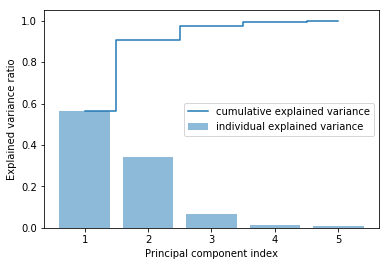

In [15]:
#Nakon sto sortiramo eigenvalues(sopstevene vrednosti), treba da odredimo koliko principal components cemo da imamo u
#novom prostoru. Jedna od mera je "explained variance" koja se racuna iz eigenvalues. Explained variance nam kaze
#koliko informacija(varijanse, disperzije) ide uz svaku komponentu(principal component)
#plotovanje - biramo 2
plt.bar(list(range(1,6)),var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(list(range(1,6)), cum_var_exp, where='mid',
         label = 'cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [38]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.57497633  0.0941029 ]
 [ 0.57816839 -0.06070924]
 [ 0.54385265  0.27049767]
 [-0.18870903  0.65446928]
 [-0.06112879  0.69710831]]


In [42]:
X_proj = X_std.dot(w)
X_proj

array([[-0.66408222, -1.97318795],
       [ 0.22097106, -1.92979475],
       [ 1.70027308, -1.7841241 ],
       [ 2.19708272, -1.82912581],
       [ 1.52296422, -1.78358293],
       [-0.03423185, -2.00275873],
       [-0.99541218, -2.24786922],
       [-1.46206573, -2.11079304],
       [ 0.57089523, -1.58542761],
       [ 1.13018903, -1.43862223],
       [ 1.37895861, -1.06037611],
       [ 1.61212193, -0.53233583],
       [ 0.88248006, -0.40680236],
       [ 0.52262533, -0.32625621],
       [ 0.10290328, -0.4396953 ],
       [-0.70575682, -0.6907957 ],
       [-1.37718627, -0.65175154],
       [-0.79381878, -0.54063662],
       [-0.43883145, -0.45427066],
       [ 0.07087554, -0.36960227],
       [-0.07480877, -0.24178626],
       [ 0.43271581,  0.03228653],
       [ 0.53839626,  0.10844296],
       [ 1.09616943,  0.35601951],
       [ 1.34410537,  0.5086645 ],
       [ 1.15966734,  0.504881  ],
       [ 1.27262286,  0.79438845],
       [ 1.67058181,  1.22554583],
       [ 2.15294599,

In [21]:
df_proj = pd.DataFrame(X_proj, columns= ['Principal component 1','Principal component 2'])
df_proj

,Principal component 1,Principal component 2
0,-0.664082,-1.973188
1,0.220971,-1.929795
2,1.700273,-1.784124
3,2.197083,-1.829126
4,1.522964,-1.783583
5,-0.034232,-2.002759
6,-0.995412,-2.247869
7,-1.462066,-2.110793
8,0.570895,-1.585428
9,1.130189,-1.438622


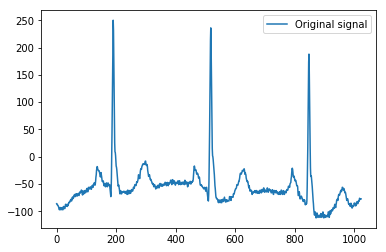

In [33]:
import pywt
import pywt.data
import numpy as np
import matplotlib.pyplot as plt

x = pywt.data.ecg()
plt.plot(x)
plt.legend(['Original signal'])

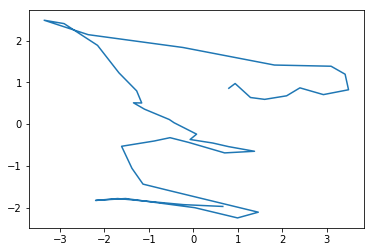

In [49]:
plt.plot(Y_pca[:,0],Y_pca[:,1])
plt.show()

C:\Users\Korisnik\Anaconda3\lib\site-packages\pywt\_multilevel.py:45: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


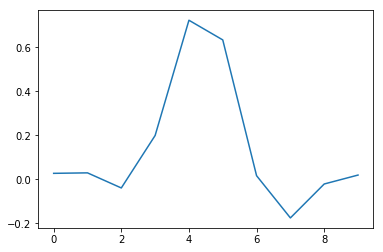

In [48]:
w = pywt.Wavelet('sym5')
plt.plot(w.dec_lo)
coeffs = pywt.wavedec(x, w, level=6)

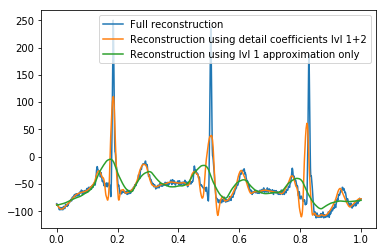

In [35]:
def reconstruction_plot(yyy, **kwargs):
    """Plot signal vector on x [0,1] independently of amount of values it contains."""
    plt.plot(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(pywt.waverec(coeffs, w)) # full reconstruction 
#reconstruction_plot(pywt.waverec(coeffs[:-1] + [None] * 1, w)) # leaving out detail coefficients up to lvl 5
#reconstruction_plot(pywt.waverec(coeffs[:-2] + [None] * 2, w)) # leaving out detail coefficients up to lvl 4
#reconstruction_plot(pywt.waverec(coeffs[:-3] + [None] * 3, w)) # leaving out detail coefficients up to lvl 3
reconstruction_plot(pywt.waverec(coeffs[:-4] + [None] * 4, w)) # leaving out detail coefficients up to lvl 2
#reconstruction_plot(pywt.waverec(coeffs[:-5] + [None] * 5, w)) # leaving out detail coefficients up to lvl 1
reconstruction_plot(pywt.waverec(coeffs[:-6] + [None] * 6, w)) # leaving out all detail coefficients = reconstruction using lvl1 approximation only
plt.legend(['Full reconstruction', 'Reconstruction using detail coefficients lvl 1+2', 'Reconstruction using lvl 1 approximation only'])


In [27]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
Y_pca = pca.fit_transform(X_std)
Y_pca

array([[ 0.66408222, -1.97318795],
       [-0.22097106, -1.92979475],
       [-1.70027308, -1.7841241 ],
       [-2.19708272, -1.82912581],
       [-1.52296422, -1.78358293],
       [ 0.03423185, -2.00275873],
       [ 0.99541218, -2.24786922],
       [ 1.46206573, -2.11079304],
       [-0.57089523, -1.58542761],
       [-1.13018903, -1.43862223],
       [-1.37895861, -1.06037611],
       [-1.61212193, -0.53233583],
       [-0.88248006, -0.40680236],
       [-0.52262533, -0.32625621],
       [-0.10290328, -0.4396953 ],
       [ 0.70575682, -0.6907957 ],
       [ 1.37718627, -0.65175154],
       [ 0.79381878, -0.54063662],
       [ 0.43883145, -0.45427066],
       [-0.07087554, -0.36960227],
       [ 0.07480877, -0.24178626],
       [-0.43271581,  0.03228653],
       [-0.53839626,  0.10844296],
       [-1.09616943,  0.35601951],
       [-1.34410537,  0.5086645 ],
       [-1.15966734,  0.504881  ],
       [-1.27262286,  0.79438845],
       [-1.67058181,  1.22554583],
       [-2.15294599,

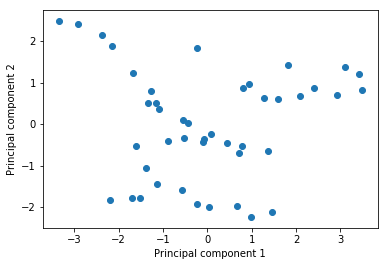

In [28]:
plt.scatter(Y_pca[:,0], Y_pca[:,1])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.show()

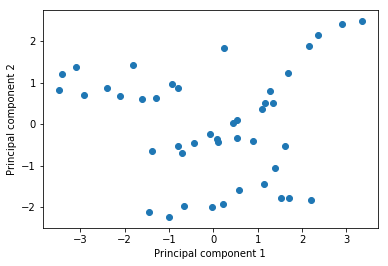

In [23]:
plt.scatter(X_proj[:,0], X_proj[:,1])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.show()

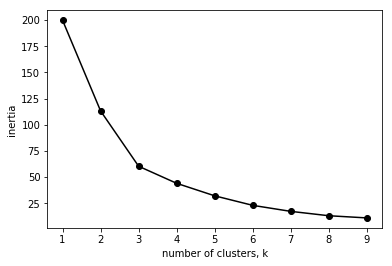

In [25]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Kreiranje KMeans slucajeve sa k klastera: model
    model = KMeans(n_clusters=k)
    
    # Fitovanje modela u uzorke
    model.fit(X_proj)
    
    # Apendovanje u listu 
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


[[ 1.7550832   1.41407424]
 [-2.10543969  0.78886431]
 [ 0.35065656 -1.07305065]]


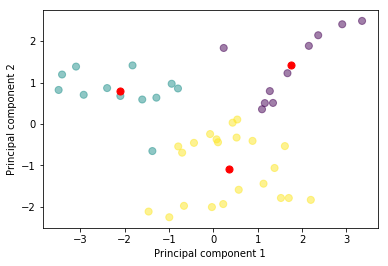

In [26]:
#plotovanje klastera preko k-means algoritma
kmeans = KMeans(n_clusters=3).fit(X_proj)
plt.scatter(X_proj[:,0], X_proj[:,1], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')


centroids = kmeans.cluster_centers_
print(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [138]:
km = KMeans(n_clusters=3).fit(df)

cluster_map = pd.DataFrame()
cluster_map['data_index'] = df.index.values
cluster_map['cluster'] = km.labels_
cluster_map

,data_index,cluster
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,8,0
9,9,0


In [139]:
cl1 = df.iloc[cluster_map[cluster_map.cluster == 0].data_index] 
cl2 = df.iloc[cluster_map[cluster_map.cluster == 1].data_index] 
cl3 = df.iloc[cluster_map[cluster_map.cluster == 2].data_index] 

In [149]:
cl1

,Residential Construction Permits Authorized,Residential Construction Units Completed,Home Sales,Homes Sold Average Sales Price,Rental Vacancy Rate
0,939.2,1317.1,550,510.3,6.000
1,1296.1,1377.2,647,577.2,5.575
2,1689.9,1657.2,820,652.2,5.225
3,1800.5,1867.6,818,752.0,5.025
4,1551.8,1870.8,709,863.0,5.425
5,1190.6,1501.5,545,917.1,5.375
6,985.6,1265.8,436,996.8,5.050
7,1000.5,1005.5,413,1005.8,5.300
8,1605.1,1390.5,622,1078.4,5.625
9,1681.9,1652.1,639,1169.9,5.850


In [144]:
df_new = pd.DataFrame(df, columns= [ 'Residential Construction Permits Authorized',
       'Residential Construction Units Completed', 'Home Sales',
       'Homes Sold Average Sales Price', 'Rental Vacancy Rate', 'Cluster'])

In [175]:
for i in range(0,3):
    df_new.iloc[cluster_map[cluster_map.cluster == i].data_index]
    df_new.iloc[cluster_map[cluster_map.cluster == i].data_index,-1]= i

In [176]:
df_new

,Residential Construction Permits Authorized,Residential Construction Units Completed,Home Sales,Homes Sold Average Sales Price,Rental Vacancy Rate,Cluster
0,939.2,1317.1,550,510.3,6.000,0
1,1296.1,1377.2,647,577.2,5.575,0
2,1689.9,1657.2,820,652.2,5.225,0
3,1800.5,1867.6,818,752.0,5.025,0
4,1551.8,1870.8,709,863.0,5.425,0
5,1190.6,1501.5,545,917.1,5.375,0
6,985.6,1265.8,436,996.8,5.050,0
7,1000.5,1005.5,413,1005.8,5.300,0
8,1605.1,1390.5,622,1078.4,5.625,0
9,1681.9,1652.1,639,1169.9,5.850,0
